### Perceptron Logic Gates
In this project, we will use perceptrons to model the fundamental building blocks of computers — logic gates.
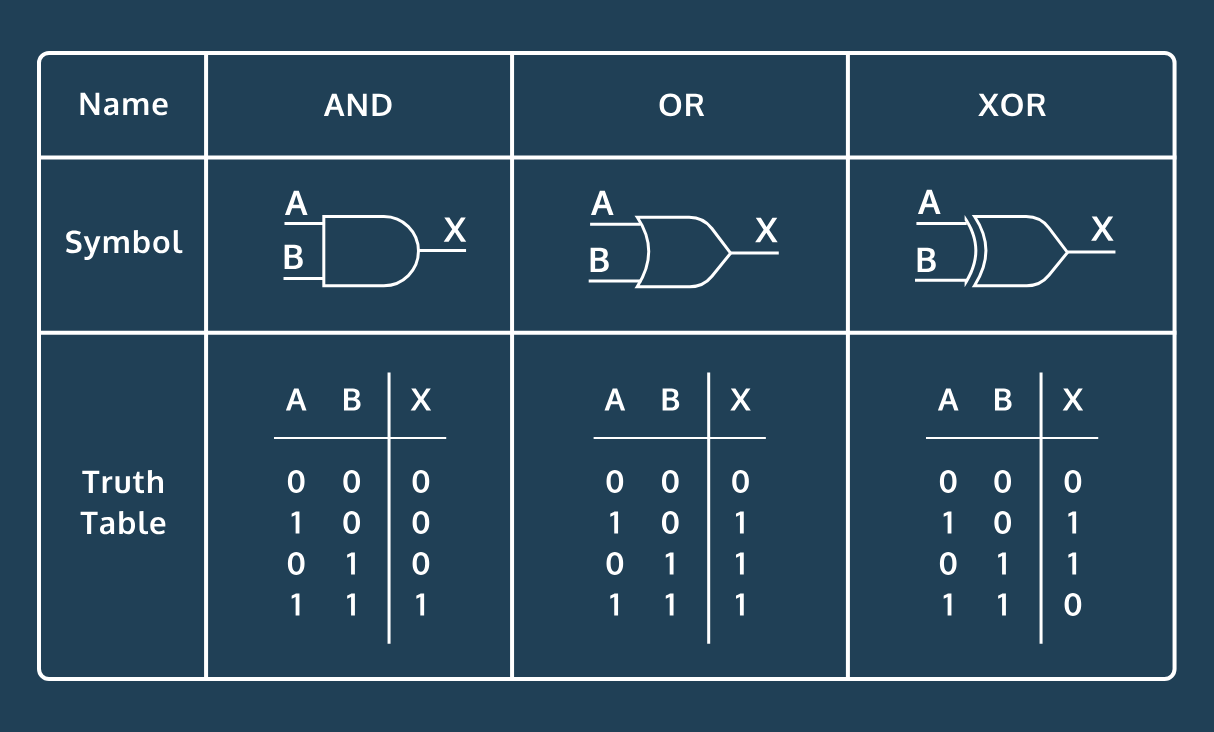

- We’ll discuss how an AND gate can be thought of as linearly separable data and train a perceptron to perform AND.
- We’ll find out about why an XOR gate isn’t linearly separable and show how a perceptron fails to learn XOR.

In [4]:
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

#### Creating and visualizing AND Data

1. To begin, let’s think of an AND gate as a dataset of four points. The four points should be the four possible inputs to the AND gate. For example, the first point in the dataset should be [0, 0]. Each data point should have a label associated with it. The label will be the result of the AND gate given the input.

In [5]:
data = [[0, 0],[0, 1],[1, 0],[1, 1]]
labels = [0, 0, 0, 1]

2. Let’s plot these four points on a graph.

We call plt.scatter() using three parameters:

- The first parameter should be a list of the x values of each point. You can get this using list comprehension — [point[0] for point in data].
- The second parameter should be a list of the y values of each point.
- The third parameter should be c = labels. This will make the points with label 1 a different color than points with label 0.

Why is this data linearly separable? Because we can draw a line as a boundary between to possible labels. 

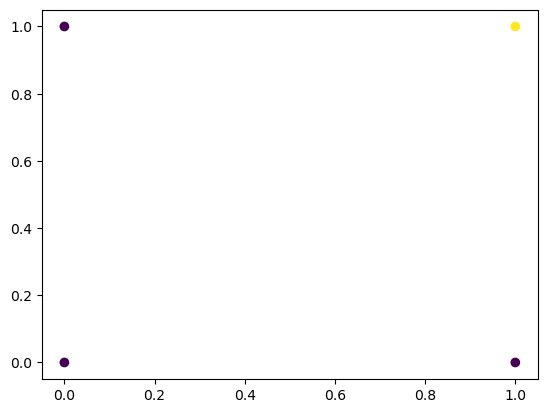

<Figure size 640x480 with 0 Axes>

In [6]:
plt.scatter([point[0] for point in data], [point[1] for point in data], c=labels)
plt.show()
plt.clf()

#### Building the Perceptron
3. Now that we have our data, let’s build a perceptron to learn AND. We create a Perceptron object named **classifier**. For now, we set the parameter ***max_iter*** to 40, and set ***random_state*** to 22. Parameter ***max_iter*** sets the number of times the perceptron loops through the training data. The default is 1000, so we’re cutting the training pretty short! Let’s see if our algorithm learns AND, even with very little training. Then we fit perceptron with **data** and **labels**.

In [7]:
classifier = Perceptron(max_iter=40, random_state=22)
classifier.fit(data, labels)


Perceptron(max_iter=40, random_state=22)

4. Let’s see if the algorithm learned AND. We print the accuracy of the model on the data points. We can note, that it is pretty unusual to train and test on the same dataset. In this case, since there are only four possible inputs to AND, we’re stuck training on every possible input and testing on those same points.

In [8]:
print("Accuracy Score:", classifier.score(data, labels))

Accuracy Score: 1.0


#### Conclusion
Our perceptron has 100% accuracy! 

#### Creating and visualizing XOR Data. Building the Perceptron
Let’s change the labels so our data now represents an XOR gate. What is the accuracy of the perceptron now? Is the data linearly separable?

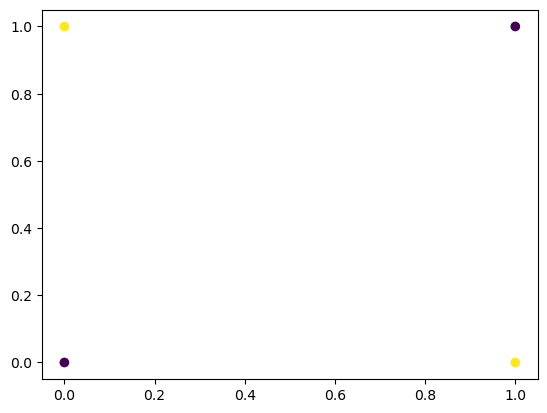

Accuracy Score: 0.5


<Figure size 640x480 with 0 Axes>

In [10]:
labels = [0, 1, 1, 0]
plt.scatter([point[0] for point in data], [point[1] for point in data], c=labels)
plt.show()
plt.clf()
classifier = Perceptron(max_iter=40, random_state=22)
classifier.fit(data, labels)
print("Accuracy Score:", classifier.score(data, labels))

#### Conclusion
Our perceptron has 50% accuracy for XOR gate! We can see that the data is not linearly separable.
#### Creating and visualizing OR Data. Building the Perceptron
Finally, let’s change the labels so our data now represents an OR gate. What is the accuracy of the perceptron now? Is the data linearly separable?

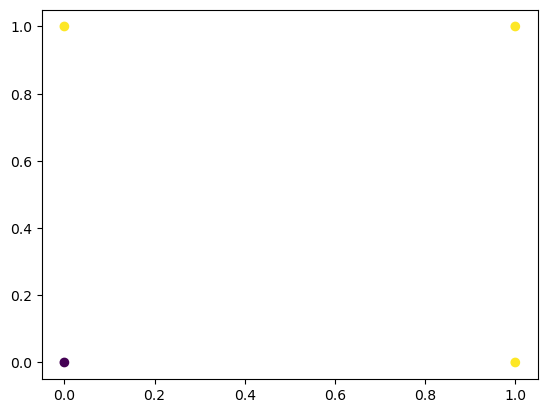

Accuracy Score: 1.0


<Figure size 640x480 with 0 Axes>

In [11]:
labels = [0, 1, 1, 1]
plt.scatter([point[0] for point in data], [point[1] for point in data], c=labels)
plt.show()
plt.clf()
classifier = Perceptron(max_iter=40, random_state=22)
classifier.fit(data, labels)
print("Accuracy Score:", classifier.score(data, labels))

#### Conclusion
Our perceptron has 100% accuracy training OR gate! We can see that the data is linearly separable.

### Visualizing the Perceptron
5. We know the perceptron has been trained correctly, but let’s try to visualize what decision boundary it is making. We change our labels to be representing an AND gate.

Let’s first investigate the classifier’s **.decision_function()** method. Given a list of points, this method returns the distance those points are from the decision boundary. The closer the number is to 0, the closer that point is to the decision boundary. We call classifier‘s **.decision_function()** method using [[0, 0], [1, 1], [0.5, 0.5]] as a parameter. 

In [13]:
labels = [0, 0, 0, 1]
classifier = Perceptron(max_iter=40, random_state=22)
classifier.fit(data, labels)
print("Decision function on [[0, 0], [1, 1], [0.5, 0.5]]:", classifier.decision_function([[0, 0], [1, 1], [0.5, 0.5]]))

Decision function on [[0, 0], [1, 1], [0.5, 0.5]]: [-4.   1.  -1.5]


6. Even though an input like [0.5, 0.5] isn’t a real input to an AND logic gate, we can still check to see how far it is from the decision boundary. We could also do this to any point from the range. Let's do this for a grid of points, and we can make a heat map that reveals the decision boundary.



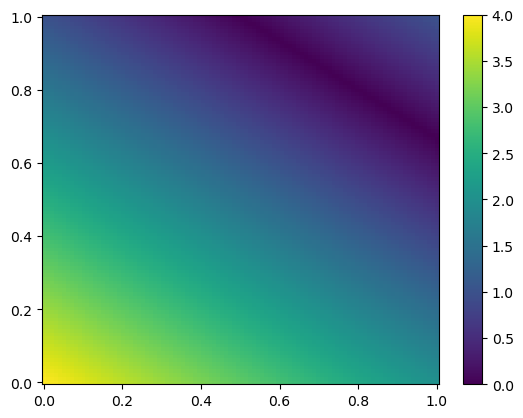

<Figure size 640x480 with 0 Axes>

In [17]:
x_values = np.linspace(0, 1, 100)
y_values = np.linspace(0, 1, 100)
point_grid = list(product(x_values, y_values))

distances = classifier.decision_function(point_grid)
abs_distances = [abs(dist) for dist in distances]
distances_matrix = np.reshape(abs_distances, (100, 100))

heatmap = plt.pcolormesh(x_values, y_values,distances_matrix)
plt.colorbar(heatmap)
plt.show()
plt.clf()

### Conclusion
We now have a great visualization of what the perceptron is doing. We can see a purple line where the distances are 0. That’s the decision boundary!

Now let's change our labels to represent an OR gate.

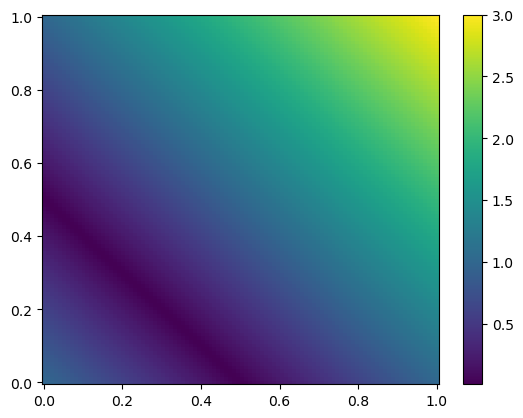

<Figure size 640x480 with 0 Axes>

In [18]:
labels = [0, 1, 1, 1]
classifier = Perceptron(max_iter=40, random_state=22)
classifier.fit(data, labels)

distances = classifier.decision_function(point_grid)
abs_distances = [abs(dist) for dist in distances]
distances_matrix = np.reshape(abs_distances, (100, 100))

heatmap = plt.pcolormesh(x_values, y_values,distances_matrix)
plt.colorbar(heatmap)
plt.show()
plt.clf()

Now let's change our labels to represent an XOR gate. Our data is not linearly separable. We can notice that with our decision boundary now.

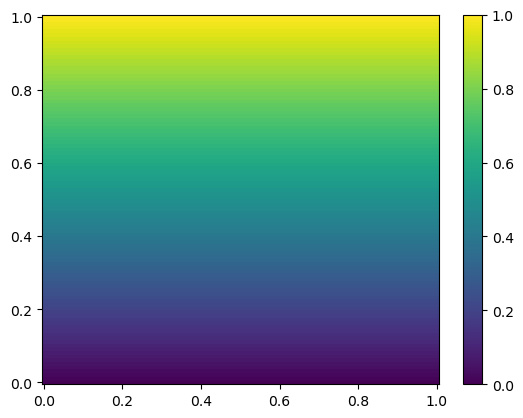

<Figure size 640x480 with 0 Axes>

In [19]:
labels = [0, 1, 1, 0]
classifier = Perceptron(max_iter=40, random_state=22)
classifier.fit(data, labels)

distances = classifier.decision_function(point_grid)
abs_distances = [abs(dist) for dist in distances]
distances_matrix = np.reshape(abs_distances, (100, 100))

heatmap = plt.pcolormesh(x_values, y_values,distances_matrix)
plt.colorbar(heatmap)
plt.show()
plt.clf()

## Final Conclusion
Perceptrons can’t solve problems that aren’t linearly separable. However, if we combine multiple perceptrons together, we will have a neural net that can solve these problems! This is similar to logic gates. AND gates and OR gates can’t produce the output of XOR gates, but when we combine a few ANDs and ORs, you can make an XOR!